In [43]:
import json
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
truc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [4]:
with open("E:////Tensorflow-Specialization//Dataset//sarcasm.json") as f:
    datastore = json.load(f)

In [8]:
sentences = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [11]:
training_sentences,testing_sentences = sentences[:training_size] , sentences[training_size:]
training_labels,testing_labels = labels[:training_size],labels[training_size:]

In [36]:
tokenizer = Tokenizer(vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)


In [44]:
training_sequence = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(sequences=training_sequence, maxlen = max_length, padding=padding_type, truncating=truc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(sequences=testing_sequences, maxlen=max_length, padding=padding_type, truncating=truc_type)
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','binary_accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 100, 16)           16000     
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 24)                38424     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 25        
Total params: 54,449
Trainable params: 54,449
Non-trainable params: 0
_________________________________________________________________


In [51]:
EPOCH = 20

history = model.fit(training_padded, training_labels, epochs=EPOCH, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/20
20000/20000 - 6s - loss: 0.4473 - accuracy: 0.7742 - binary_accuracy: 0.7742 - val_loss: 0.3783 - val_accuracy: 0.8238 - val_binary_accuracy: 0.8238
Epoch 2/20
20000/20000 - 7s - loss: 0.3179 - accuracy: 0.8593 - binary_accuracy: 0.8593 - val_loss: 0.3650 - val_accuracy: 0.8323 - val_binary_accuracy: 0.8323
Epoch 3/20
20000/20000 - 8s - loss: 0.2853 - accuracy: 0.8741 - binary_accuracy: 0.8741 - val_loss: 0.3753 - val_accuracy: 0.8298 - val_binary_accuracy: 0.8298
Epoch 4/20
20000/20000 - 7s - loss: 0.2585 - accuracy: 0.8889 - binary_accuracy: 0.8889 - val_loss: 0.4101 - val_accuracy: 0.8159 - val_binary_accuracy: 0.8159
Epoch 5/20
20000/20000 - 4s - loss: 0.2305 - accuracy: 0.9021 - binary_accuracy: 0.9021 - val_loss: 0.4266 - val_accuracy: 0.8217 - val_binary_accuracy: 0.8217
Epoch 6/20
20000/20000 - 5s - loss: 0.2022 - accuracy: 0.9176 - binary_accuracy: 0.9176 - val_loss: 0.4711 - val_accuracy: 0.8147 - val_binary_accuracy

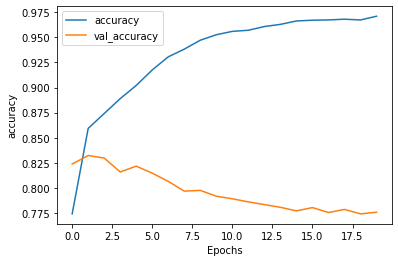

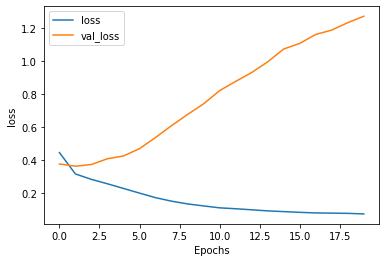

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graph(history,"accuracy")
plot_graph(history,"loss")

In [59]:
model.get_layer(index=0).get_weights()[0].shape

(1000, 16)

In [61]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truc_type)
print(model.predict(padded))

[[0.02081882]
 [0.9791444 ]]


In [62]:
model.predict_classes(padded)

array([[0],
       [1]])